In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("UberDataset.csv")

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.shape

(1156, 7)

In [5]:
df.info

<bound method DataFrame.info of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1

In [6]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [7]:
df["PURPOSE"].fillna("Not", inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_6928\3531432500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PURPOSE"].fillna("Not", inplace=True)


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [10]:
df.shape

(1155, 7)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(1154, 7)

In [13]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

## PURPOSE OF RIDES

In [14]:
purpose = df["PURPOSE"].value_counts()

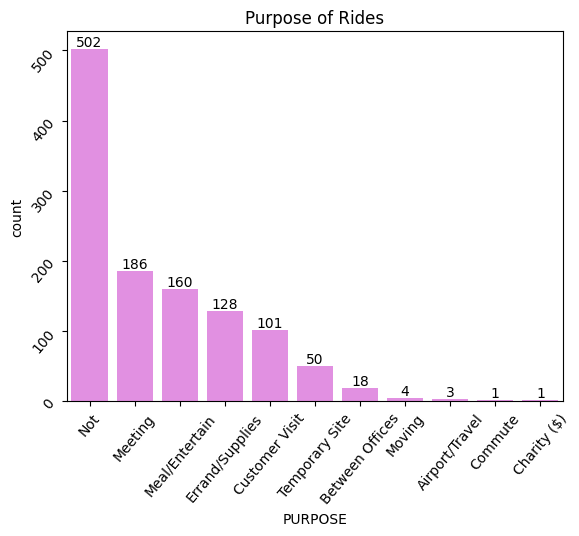

In [15]:
ax=sns.barplot(data=purpose, color = "violet")
plt.xticks(rotation=50)
plt.yticks(rotation=50)
plt.title("Purpose of Rides")
ax.bar_label(ax.containers[0])
plt.show()

## RIDES GENERATED BY CATEGORY

In [16]:
category = df["CATEGORY"].value_counts()

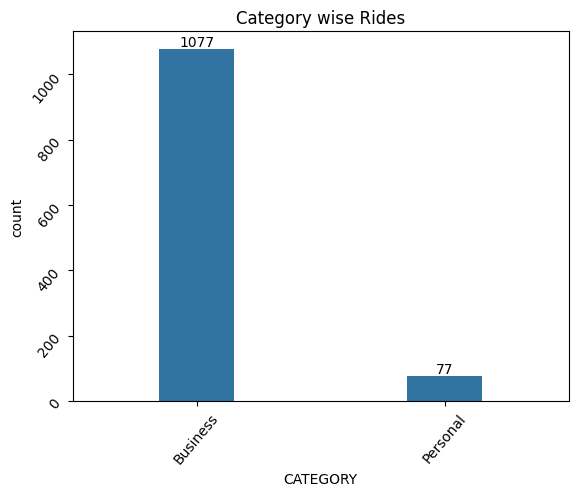

In [17]:
ax=sns.barplot(data=category, width=0.3)
plt.xticks(rotation=50)
plt.yticks(rotation=50)
plt.title("Category wise Rides")
ax.bar_label(ax.containers[0])
plt.show()

In [18]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [19]:
av=round(df["MILES"].sum()/1154,2)
print("Average ride by every customer is",av)

Average ride by every customer is 10.57


## MILES GENERATED BY CARY STOP

In [20]:
df["STOP"].value_counts()

STOP
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
El Cerrito            1
Fuquay-Varina         1
Wake Co.              1
Gampaha               1
Ilukwatta             1
Name: count, Length: 188, dtype: int64

In [21]:
c=df[df["STOP"]=="Cary"]

In [22]:
print("Miles generated by carry stop are : ",round(c["MILES"].sum(),2))

Miles generated by carry stop are :  1903.2


## RIDES DISTRIBUTION ON THE BASIS OF DAY TIMING

In [23]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], 
                                       errors='coerce')

In [24]:
df["END_DATE"]=pd.to_datetime(df["END_DATE"],
                                errors = "coerce")

In [25]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [26]:
import datetime

df['DATE'] = pd.DatetimeIndex(df['START_DATE']).date
df['TIME'] = pd.DatetimeIndex(df['START_DATE']).hour

#changing into categories of day and night
df['DAY_TIMING'] = pd.cut(x=df['TIME'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])


In [27]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_TIMING
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night


<Axes: xlabel='DAY_TIMING', ylabel='count'>

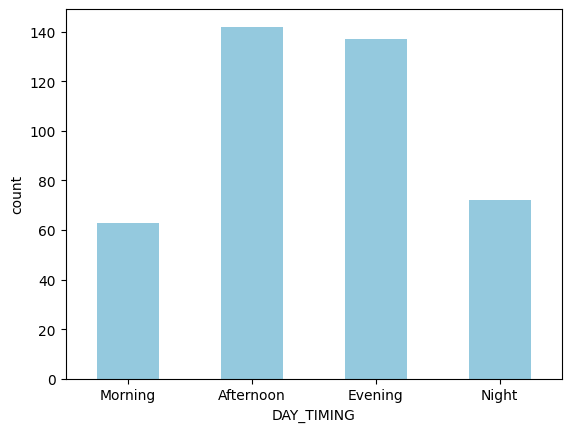

In [28]:
sns.countplot(x = "DAY_TIMING", data = df, width = 0.5, color = "skyblue")

## HOUR BASED RIDES ANALYSIS

In [29]:
df["HOUR"]=pd.DatetimeIndex(df["START_DATE"]).hour

In [30]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_TIMING,HOUR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,20.0


<Axes: xlabel='HOUR', ylabel='MILES'>

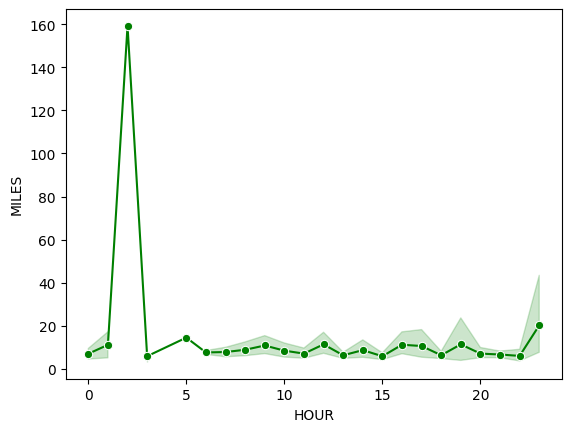

In [31]:
sns.lineplot(x = "HOUR", y = "MILES", data = df, color = "green", marker = "o")

## RIDES DURING A DAY BASES ON CATEGORY

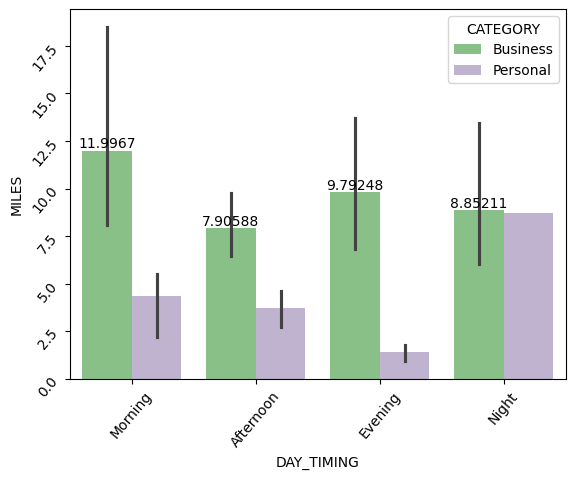

In [32]:
ax=sns.barplot(x="DAY_TIMING", y="MILES", data=df, hue="CATEGORY", palette= "Accent")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=50)
plt.yticks(rotation=50)
plt.show()

## RIDES DURING THE MONTHS

In [34]:
df['MONTHS']=pd.DatetimeIndex(df['DATE']).month
month_label={1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df["MONTHS"] = df.MONTHS.map(month_label)

df.MONTHS.value_counts(sort=False)

MONTHS
Jan      23
Feb      40
Mar      42
April    25
May      26
June     42
July     41
Aug      43
Sep      13
Oct      24
Nov      63
Dec      39
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MONTHS'>

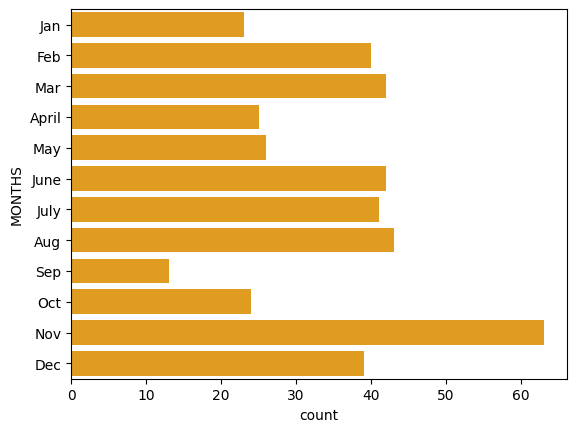

In [46]:
sns.countplot(df["MONTHS"], color = "orange")

## RIDES OVER THE WEEK DAYS

In [37]:
df['DAYS']=pd.DatetimeIndex(df['DATE']).day
day_label={0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur',
               4: 'Fri', 5: 'Sat', 6: 'Sun'}
df["DAYS"] = df.DAYS.map(day_label)
df.DAYS.value_counts(sort=False)

DAYS
Tue     43
Wed     30
Sat     33
Sun     33
Fri     33
Thur    33
Name: count, dtype: int64

In [38]:
count=df['DAYS'].value_counts(sort=False)
count

DAYS
Tue     43
Wed     30
Sat     33
Sun     33
Fri     33
Thur    33
Name: count, dtype: int64

In [39]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_TIMING,HOUR,MONTHS,DAYS
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,21.0,Jan,Tue
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,1.0,Jan,Wed
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,20.0,Jan,Wed
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,17.0,Jan,Sat
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,14.0,Jan,Sun


[Text(0, 0, '7.69535'),
 Text(0, 0, '20.4333'),
 Text(0, 0, '6.23939'),
 Text(0, 0, '15.6879'),
 Text(0, 0, '7.80606'),
 Text(0, 0, '9.35758')]

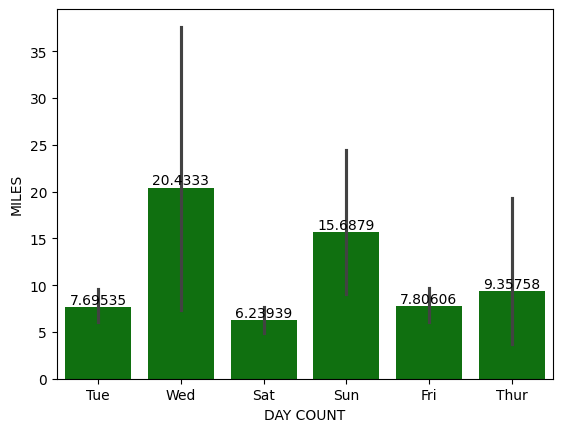

In [40]:
count=df['DAYS'].value_counts(sort=False)
ax=sns.barplot(y='MILES', x='DAYS', data=df, color="green")
plt.xlabel("DAY COUNT")
ax.bar_label(ax.containers[0])

## MAIN PURPOSE OF CUSTOMERS ON WEDNESDAY RIDE

In [41]:
df1=df[df['DAYS']=="Wed"]

In [42]:
df1['CATEGORY'].value_counts()

CATEGORY
Business    28
Personal     2
Name: count, dtype: int64

## WHICH STARTING POINT CAN BE THE MOST BENEFICIAL FOR A RIDER

In [52]:
df['START'].value_counts()

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Krendle Woods         1
Fuquay-Varina         1
Wake Co.              1
Katunayake            1
Gampaha               1
Name: count, Length: 177, dtype: int64